<a href="https://colab.research.google.com/github/arzucivelekoglu/basic-opencv-projects/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Classification - Preprocessing

*`“UrbanSounds8K”`* veri setini kullanarak şehirlerde duyulan seslerin
sınıflandırılmasıyla ilgili bir proje yapacağız.


**Veri Setini İnceleme**

Bu veri kümesi, 10 sınıftan kentsel seslerin 8732 etiketli ses alıntısını içerir. 

Ses sınıfının sayısal bir tanımlayıcısı:
* 0 = air_conditioner
* 1 = car_horn
* 2 = children_playing
* 3 = dog_bark
* 4 = delme
* 5 = engine_idling
* 6 = gun_shot
* 7 = jackhammer
* 8 = siren
* 9 = street_music

## Read, Gray Scale, Resize

Drive da bulunan spectogram görüntülerinin dosya konumlarını  **UrbanSound8K** veri setini kullanarak  erişiyoruz.

Daha sonra OpenCV kütüphanesi ile görüntüyü okuyup, gri skalaya çeviriyoruz ve  boyutunu 28x28 yapıp bir listeye ekliyoruz.



In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/global_ai_hub/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


Görüntüleri ait oldukları etiketlerle birlikte, [görüntü, etiket] formatında bir
listeye ekliyoruz.

In [ ]:
data_label = []

for index_num, row in tqdm(df.iterrows()):

  pic_name = row["slice_file_name"]
  pic_name = pic_name.replace('wav','png')
  file_name = "/content/drive/MyDrive/global_ai_hub/spectrogram_x/fold" +str(row["fold"])+"/"+pic_name
  
  data = cv2.imread(file_name,0)
  data = cv2.resize(data, None, fx=0.5, fy=0.5)

  label = row["classID"]

  data_label.append([data, label])

8732it [00:41, 210.12it/s]


*❗ Normalizasyon işlemi CNN kısmında yapılacaktır.*

Elde ettiğimiz listeyi train ve test olarak ayırabilmek için ilk olarak bir DataFrame'e çeviriyoruz.

In [ ]:
new_df = pd.DataFrame(data_label, columns=["images", "class"])
new_df.head()

,images,class
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",3
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",2
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",2
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",2
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",2


* *Bağımlı değişkenimiz* okunmuş spectogram verisi.--> (x)

* *Bağımsız değişkenimiz* ise class bilgisi. --> (y)

In [ ]:
x = np.array(new_df["images"].tolist()) #images bağımsız değişken x
y = np.array(new_df["class"].tolist()) # class bağımlı değişken y

`sklearn` kütüphanesinden `train_test_split` 'i kullanarak verimizi Train ve Test olarak bölüyoruz.

In [ ]:
from sklearn.model_selection import train_test_split

# Veri seti öncelikle train ve test olarak ikiye ayrılıyor
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2, # test için ayrılan küme yüzdesi
                                                    random_state = 42)

In [ ]:
# Train Data
print ("X_train  shape: " + str(X_train.shape))
print ("X_train  data: " + str(len(X_train)))
print ("y_train data: " + str(len(y_train)))
print ("Dimensions of x_train:" + str(X_train[1].shape))
print ("Labels in x_train:" + str(y_train.shape))

#Test Data
print("\n")
print ("X_test  shape: " + str(X_test.shape))
print ("X_test data: " + str(len(X_test)))
print ("y_test data: " + str(len(y_test)))
print ("Dimensions of x_test:" + str(X_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

X_train  shape: (6985, 144, 216)
X_train  data: 6985
y_train data: 6985
Dimensions of x_train:(144, 216)
Labels in x_train:(6985,)


X_test  shape: (1747, 144, 216)
X_test data: 1747
y_test data: 1747
Dimensions of x_test:(144, 216)
Labels in y_test:(1747,)


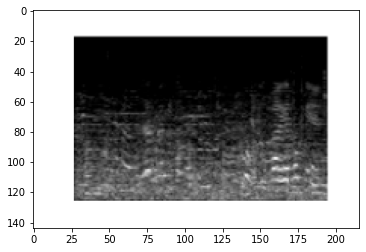

In [ ]:
plt.imshow(X_train[85], cmap='gray')

In [ ]:
type(X_train)

numpy.ndarray

Elde ettiğimiz veri setlerini bilgisayarımıza kaydediyoruz.

In [ ]:
np.save('X_train', X_train)
np.save('y_train', y_train)
np.save('X_test', X_test)
np.save('y_test', y_test)